exploring the mean price by zipcode

In [1]:
import os
import sys
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DBNAME = "king_county_housing_prices"
conn = psycopg2.connect(dbname=DBNAME)

In [3]:
zipdata = pd.read_sql("""
                    SELECT 
                        SUBSTRING (rb.zipcode, 1,5) AS zipcode
                        ,COUNT (*) 
                        ,AVG(rps.saleprice::float) as meansaleprice
                        ,AVG(rb.squarefeettotalliving) as meansqft
                    FROM real_property_sales rps
                    JOIN residential_building rb
                         ON rb.major = rps.major
                         AND rb.minor = rps.minor
                    WHERE  (rps.propertytype = '12' OR rps.propertytype = '14' OR rps.propertytype = '18' OR rps.propertytype = '11')
                        AND (rps.principaluse = '2' OR rps.principaluse = '6')
                        AND (rps.documentdate > '2018-12-31' and rps.documentdate < '2020-01-01')
                        AND (rb.squarefeettotalliving > 800 AND rb.squarefeettotalliving  < 4500)
                        AND (rps.saleprice > 10.00 AND rps.saleprice < 2500000)
                    GROUP BY SUBSTRING (rb.zipcode, 1,5)
                    HAVING count(*) > 100
                    ORDER BY meansaleprice desc
                    """,conn)

In [4]:
zipdata

,zipcode,count,meansaleprice,meansqft
0,98004,143,1.600036e+06,2554.335664
1,98040,192,1.459237e+06,2846.661458
2,98112,180,1.253602e+06,2150.777778
3,98119,120,1.165865e+06,2085.050000
4,98033,277,1.133903e+06,2280.216606
...,...,...,...,...
57,98168,239,4.157343e+05,1640.167364
58,98003,283,4.052898e+05,1847.452297
59,98001,344,4.031552e+05,1886.235465
60,98032,117,3.885014e+05,1841.760684


In [5]:
zipdata.shape

(62, 4)

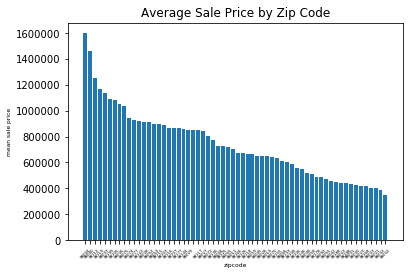

In [6]:
zipcode = zipdata.zipcode
meansaleprice = zipdata.meansaleprice
meansqft = zipdata.meansqft
plt.bar (zipcode, meansaleprice)
plt.xlabel ('zipcode', fontsize = 6)
plt.ylabel ('mean sale price', fontsize = 6)
plt.xticks (zipcode, fontsize = 4, rotation = 45)
plt.title ('Average Sale Price by Zip Code')
plt.show()

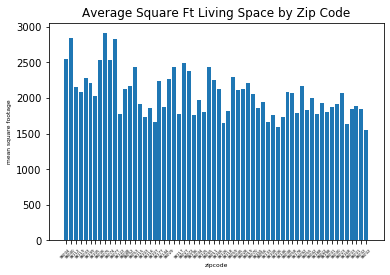

In [7]:
plt.bar (zipcode, meansqft)
plt.xlabel ('zipcode', fontsize = 6)
plt.ylabel ('mean square footage', fontsize = 6)
plt.xticks (zipcode, fontsize = 4, rotation = 45)
plt.title ('Average Square Ft Living Space by Zip Code')
plt.show ();

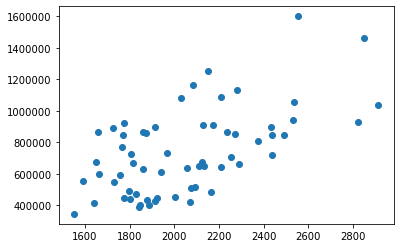

In [8]:
plt.scatter(meansqft,meansaleprice);

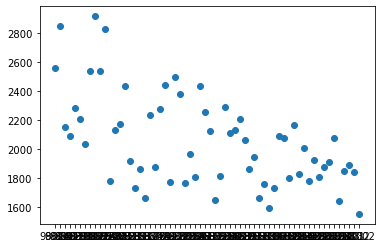

In [9]:
plt.scatter(zipcode, meansqft);

Zipcode looks to be influencing mean sales price.  